In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df=pd.read_csv("/content/drive/MyDrive/Python Files DataJarLabs/train.csv")

dfo=df
#dfo is the orginal dataframe. I am always saving the orginal dataframe for future purposes.

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
print(df.head(10))
print(df.describe())
print(df.info())
print(df.isnull().sum()*100/df.shape[0])

   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S
5            6         0       3  ...   8.4583   NaN         Q
6            7         0       1  ...  51.8625   E46         S
7            8         0       3  ...  21.0750   NaN         S
8            9         1       3  ...  11.1333   NaN         S
9           10         1       2  ...  30.0708   NaN         C

[10 rows x 12 columns]
       PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
std     257.353842    0.486592 

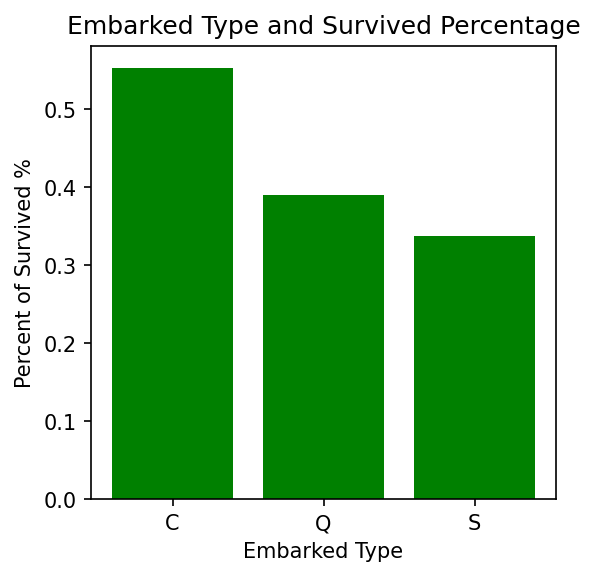

In [ ]:
plt.figure(figsize=(4,4), dpi = 150)
dfgbe=df.groupby(by="Embarked").sum()/df.groupby(by="Embarked").count()
dfgbe["Embarked"]=dfgbe.index
plt.bar(x = dfgbe["Embarked"], height = dfgbe["Survived"], color = "green")
plt.title('Embarked Type and Survived Percentage')
plt.xlabel('Embarked Type')
plt.ylabel('Percent of Survived %')
plt.show()


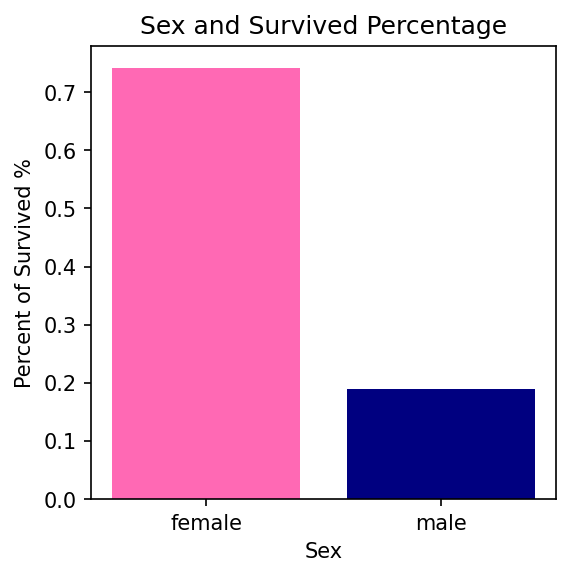

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
plt.figure(figsize=(4,4), dpi = 150)
dfgbs=df.groupby(by="Sex").sum()/df.groupby(by="Sex").count()
dfgbs["Sex"]=dfgbs.index
plt.bar(x = dfgbs["Sex"], height = dfgbs["Survived"], color = ["hotpink","navy"])
plt.title('Sex and Survived Percentage')
plt.xlabel('Sex')
plt.ylabel('Percent of Survived %')
plt.show()

df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

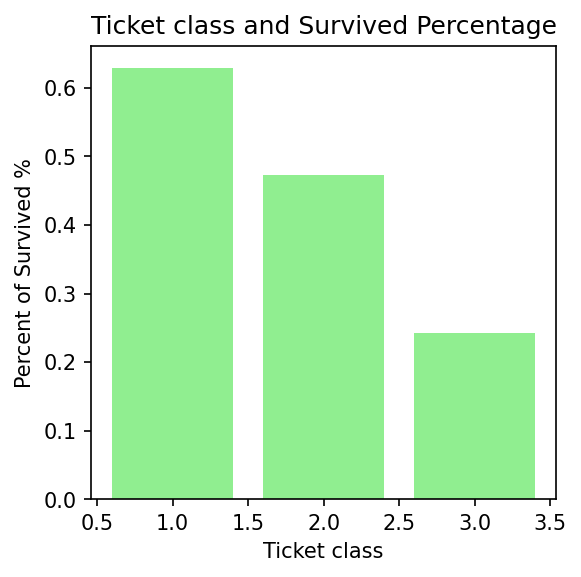

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
plt.figure(figsize=(4,4), dpi = 150)
dfgbpc=df.groupby(by="Pclass").sum()/df.groupby(by="Pclass").count()
dfgbpc["Pclass"]=dfgbpc.index
plt.bar(x = dfgbpc["Pclass"], height = dfgbpc["Survived"], color = "lightgreen")
plt.title('Ticket class and Survived Percentage')
plt.xlabel('Ticket class')
plt.ylabel('Percent of Survived %')
plt.show()

df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

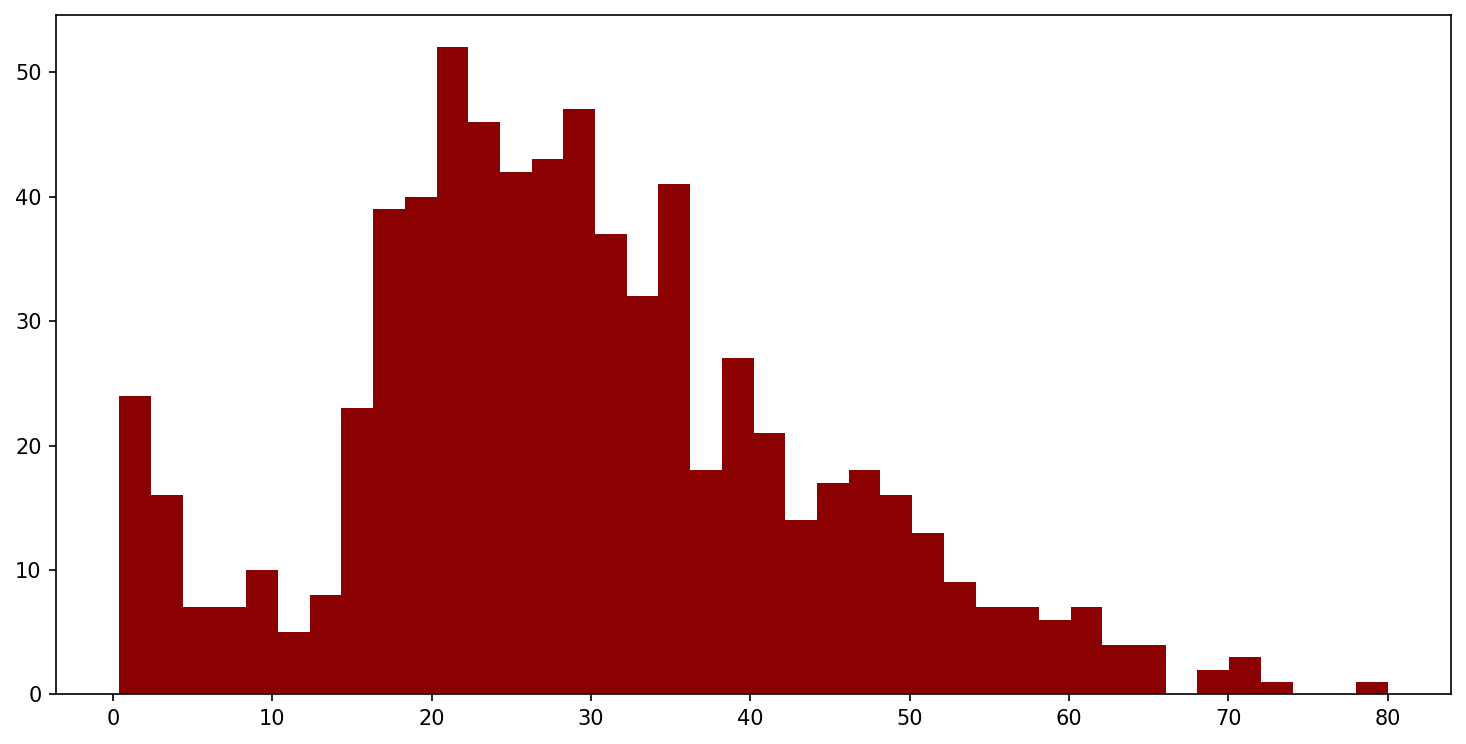

In [ ]:
plt.figure(figsize=(12,6), dpi = 150)
plt.hist(df["Age"], color = "darkred",bins=40)
plt.show()


Mean Age of Survivors: 28.343689655172415
Mean Age of Deads: 30.62617924528302


<Figure size 1800x900 with 0 Axes>

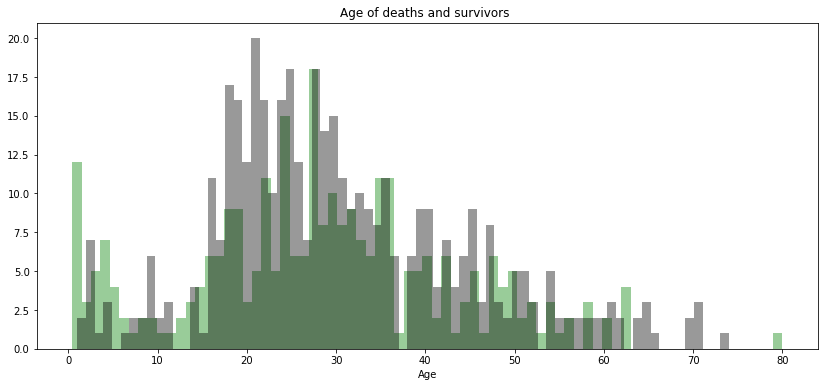

In [ ]:
plt.figure(figsize=(12,6), dpi = 150)
plt.figure(figsize=(14,6))
dfsr=df[df["Survived"]==1]
dfdt=df[df["Survived"]==0]
plt.hist(dfsr["Age"], color='green', bins=75 ,alpha=.4) 
plt.hist(dfdt["Age"], color='black', bins=75 ,alpha=.4)
plt.title('Age of deaths and survivors ')
plt.xlabel('Age')
print("Mean Age of Survivors:",dfsr["Age"].mean())
print("Mean Age of Deads:",dfdt["Age"].mean())

plt.show()


Mean Ticket Fare of Survivors: 48.39540760233917
Mean Ticket Fare of Deads: 22.117886885245877


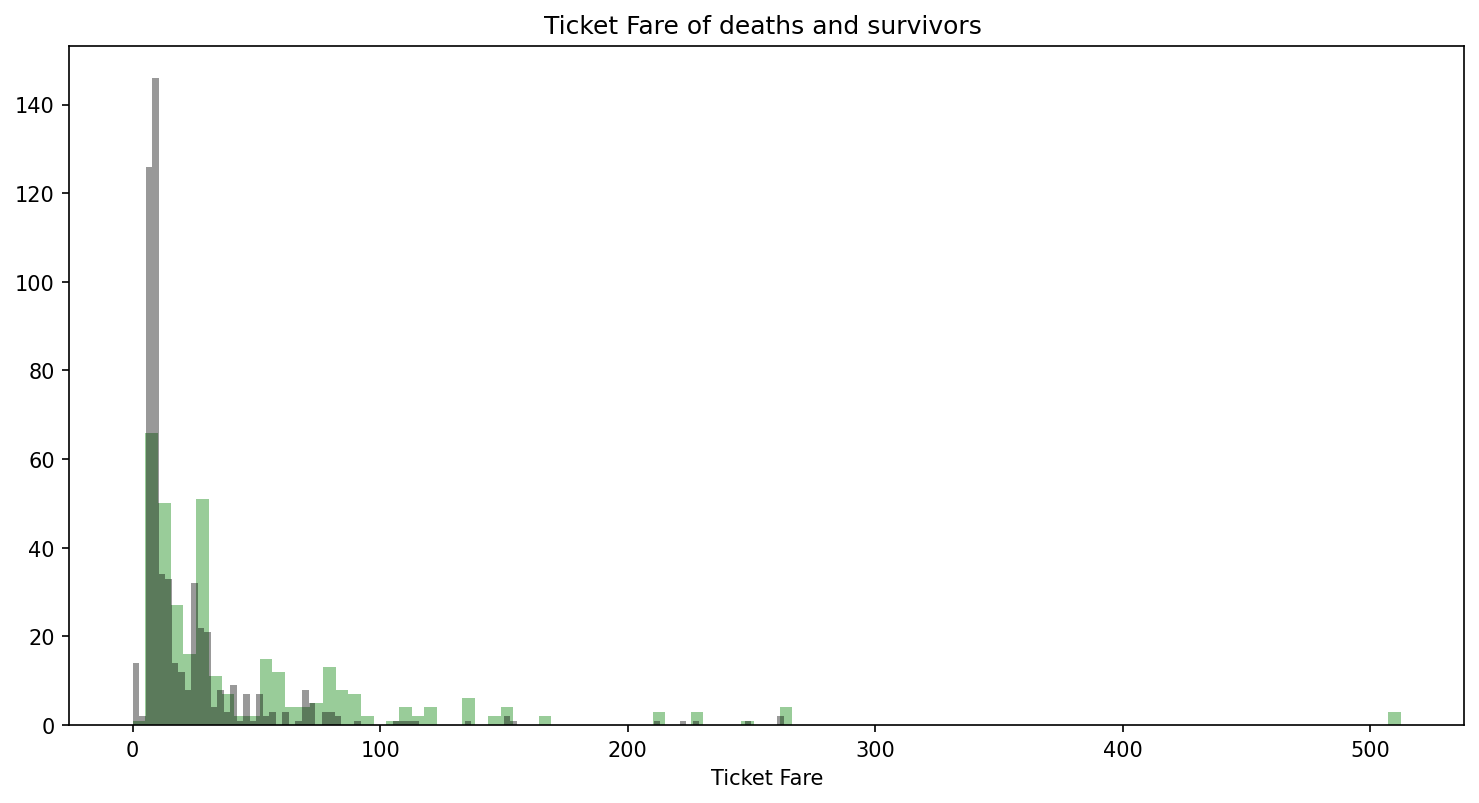

In [ ]:
plt.figure(figsize=(12,6), dpi = 150)
plt.hist(dfsr["Fare"], color='green', bins=100 ,alpha=.4) 
plt.hist(dfdt["Fare"], color='black', bins=100 ,alpha=.4)
plt.title('Ticket Fare of deaths and survivors ')
plt.xlabel('Ticket Fare')
print("Mean Ticket Fare of Survivors:",dfsr["Fare"].mean())
print("Mean Ticket Fare of Deads:",dfdt["Fare"].mean())

plt.show()

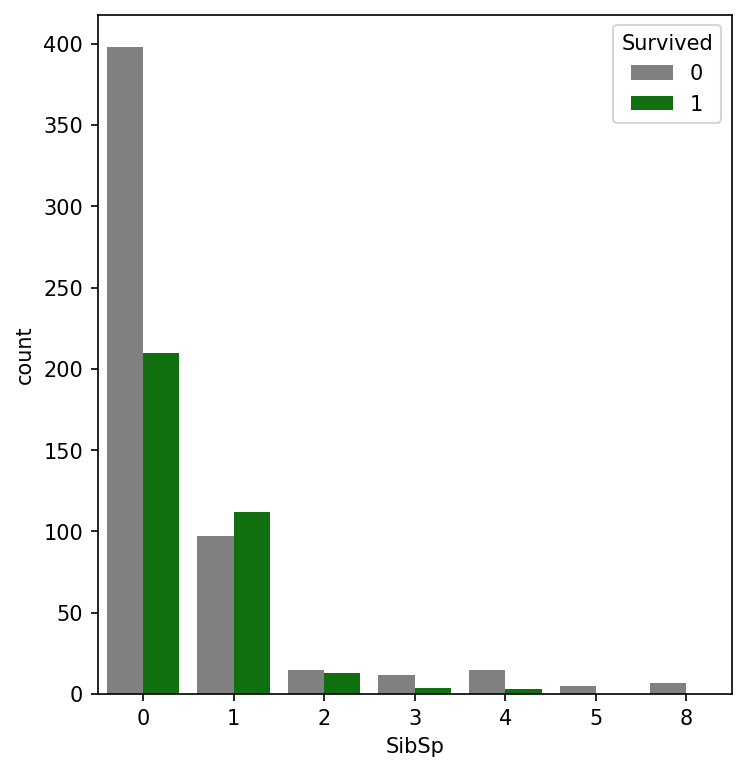

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [ ]:
plt.figure(figsize=(12,6), dpi = 150)
plt.subplot(1,2,1)
sns.countplot(x = 'SibSp', data = df, hue= "Survived",palette={0: "gray", 1: "green"})
plt.legend(title="Survived",loc='upper right')

plt.show()

df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)


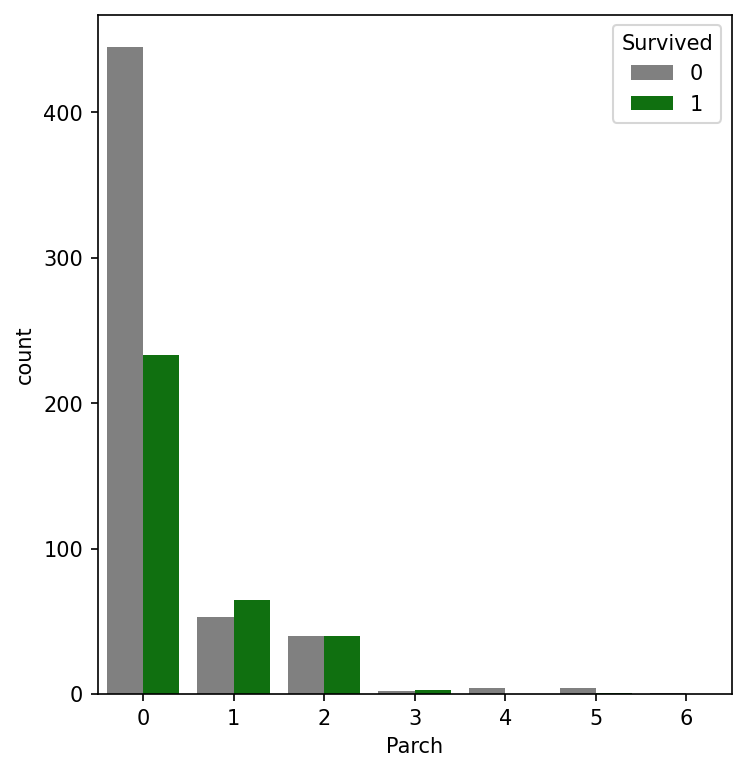

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [ ]:
plt.figure(figsize=(12,6), dpi = 150)
plt.subplot(1,2,1)
sns.countplot(x = 'Parch', data = df, hue= "Survived",palette={0: "gray", 1: "green"})
plt.legend(title="Survived",loc='upper right')

plt.show()

df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by="Survived", ascending=False)

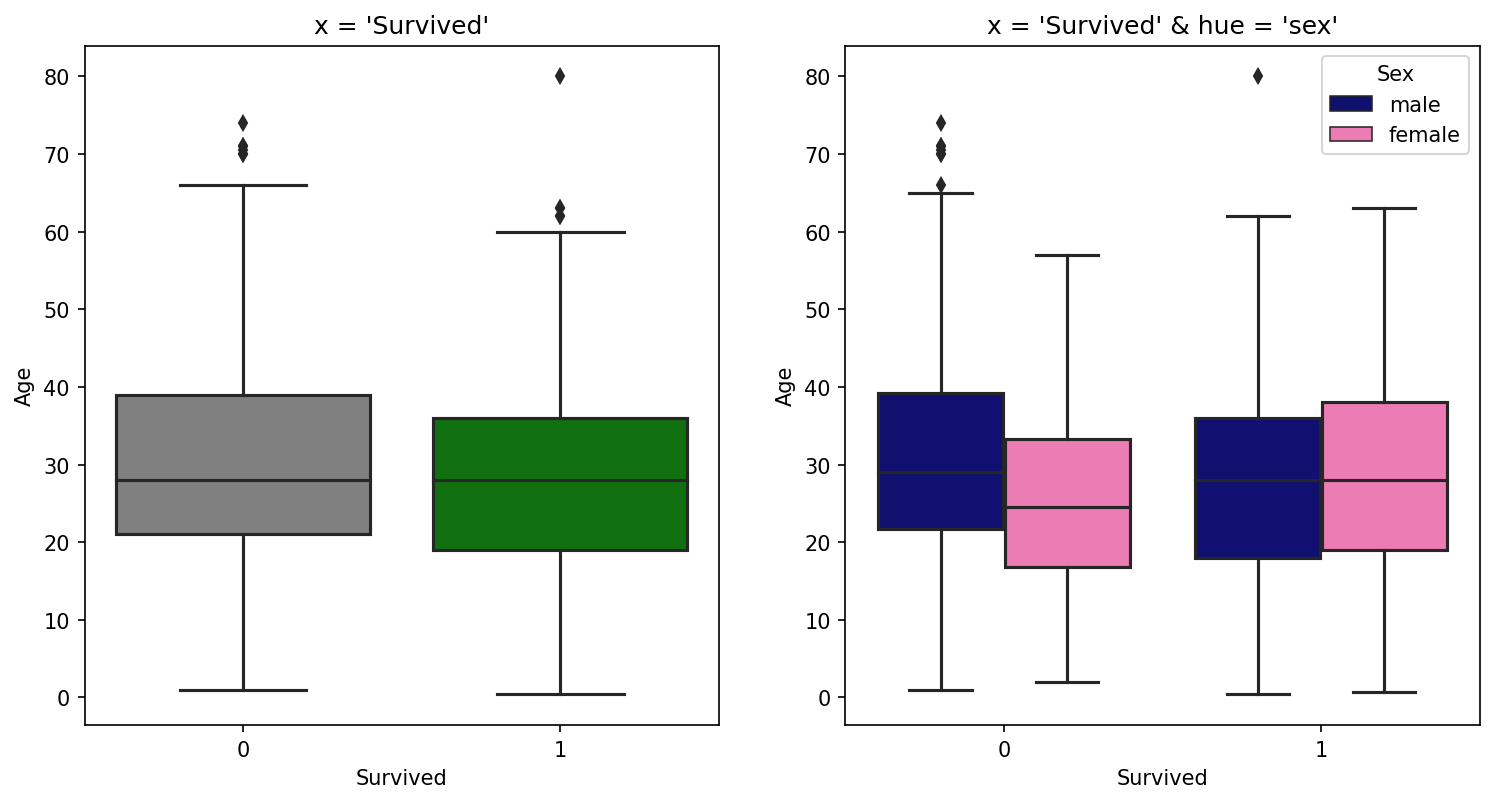

In [ ]:
plt.figure(figsize=(12, 6), dpi = 150)
plt.subplot(1,2,1)
sns.boxplot(x = 'Survived',  y = 'Age', data = df, palette = ['gray', 'green'])
plt.title("x = 'Survived'")

plt.subplot(1,2,2)
sns.boxplot(x = 'Survived',  y = 'Age', hue = 'Sex', data = df, palette = ["navy","hotpink"])
plt.title("x = 'Survived' & hue = 'sex'")

plt.show()


In [ ]:
#There are a lot of null values in "Cabin" column also we have some null values in "Age" and "Embarked" column. We can delete "Cabin" column.
#Fill Nan values with median in age column for each sex and Pclass since they are correlated and fill the nan values with the most frequent one in "Embarked" column since it is categorical.
#Ticket column is irrelevant so we can drop it.
del df["Cabin"]
del df["Ticket"]

In [ ]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [ ]:
agepcsex = df.groupby(['Sex', 'Pclass']).median()['Age']
print(agepcsex)
df['Age'] = df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
df

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [ ]:
df["Embarked"].value_counts()
df["Embarked"] = df["Embarked"].fillna("S")
print(df.isnull().sum()*100/df.shape[0])
print(df.info())
df["Age"].value_counts()



PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Fare           0.0
Embarked       0.0
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB
None


25.00    117
21.50     42
40.00     34
30.00     34
24.00     30
        ... 
66.00      1
36.50      1
55.50      1
23.50      1
0.42       1
Name: Age, Length: 89, dtype: int64

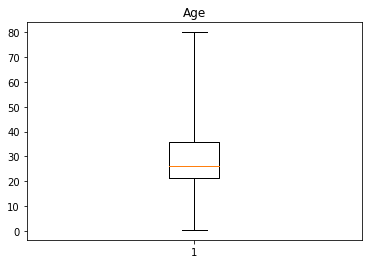

In [ ]:
#Now I will handle the outliers.

plt.boxplot(df["Age"],whis=4)
plt.title("Age")
plt.show()

#From my perspective, there are no outliers for the age column.

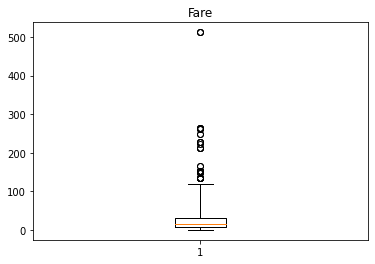

     PassengerId  Survived  Pclass  ... Parch      Fare  Embarked
258          259         1       1  ...     0  512.3292         C
679          680         1       1  ...     1  512.3292         C
737          738         1       1  ...     0  512.3292         C

[3 rows x 10 columns]


In [ ]:
plt.boxplot(df["Fare"],whis=4)
plt.title("Fare")
plt.show()

print(df[df["Fare"]>500])
#From my perspective, there are no outliers for the Fare column since there are 3 people who paid 512 for the tickets.

In [ ]:
df= pd.concat([df, pd.get_dummies(df["Sex"])], axis=1)
df=df.drop("Sex",axis=1)
df=df.drop("male",axis=1)
df["Female"]=df["female"]
df=df.drop("female",axis=1)

df.head()



,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Embarked,Female
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,S,0


In [ ]:
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1
#If Family Size = 1 then passenger is alone.
df['Alone']=0
df.loc[df.Family_Size==1,'Alone']=1
df.head()


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Embarked,Female,Family_Size,Alone
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,S,0,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,C,1,2,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,S,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,S,1,2,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,S,0,1,1


In [ ]:
df['Age_Scale'] = pd.cut(df['Age'], 6)
print(df['Age_Scale'].unique())
df=df.drop("Age_Scale",axis=1)
df.head()

[(13.683, 26.947], (26.947, 40.21], (53.473, 66.737], (0.34, 13.683], (40.21, 53.473], (66.737, 80.0]]
Categories (6, interval[float64]): [(0.34, 13.683] < (13.683, 26.947] < (26.947, 40.21] <
                                    (40.21, 53.473] < (53.473, 66.737] < (66.737, 80.0]]


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Embarked,Female,Family_Size,Alone
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,S,0,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,C,1,2,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,S,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,S,1,2,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,S,0,1,1


In [ ]:
def Grouping(age):
    if age <= 13.683:
        return 1
    elif (age > 13.683) and (age < 26.947):
        return 2
    elif (age > 26.947) and (age < 40.21):
        return 3
    elif (age > 40.21) and (age < 53.473):
        return 4
    elif (age > 53.473) and (age < 66.737):
        return 5
    else:
        return 6

df['Age_Group'] = df['Age'].apply(Grouping)
df





,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Embarked,Female,Family_Size,Alone,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,S,0,2,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,C,1,2,0,3
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,S,1,1,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,S,1,2,0,3
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,S,0,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,13.0000,S,0,1,1,3
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,30.0000,S,1,1,1,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",21.5,1,2,23.4500,S,1,4,0,2
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,30.0000,C,0,1,1,2


In [ ]:
def Grouping2(Embarked):
    if Embarked == "C":
        return 0
    elif Embarked == "S":
        return 1
    else:
        return 2

df['Embarked'] = df['Embarked'].apply(Grouping2)
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Embarked,Female,Family_Size,Alone,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,1,0,2,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,0,1,2,0,3
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,1,1,1,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,1,1,2,0,3
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,1,0,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,13.0000,1,0,1,1,3
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,30.0000,1,1,1,1,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",21.5,1,2,23.4500,1,1,4,0,2
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,30.0000,0,0,1,1,2


In [ ]:
df['FareBand'] = pd.qcut(df['Fare'], 4)
print(df['FareBand'].unique())
df=df.drop("FareBand",axis=1)
df.head()

[(-0.001, 7.91], (31.0, 512.329], (7.91, 14.454], (14.454, 31.0]]
Categories (4, interval[float64]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] <
                                    (31.0, 512.329]]


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Embarked,Female,Family_Size,Alone,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,1,0,2,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,0,1,2,0,3
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,1,1,1,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,1,1,2,0,3
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,1,0,1,1,3


In [ ]:
def Grouping3(Fare):
    if Fare <= 7.91:
        return 1
    elif (Fare > 7.91) and (Fare < 14.454):
        return 2
    elif (Fare > 14.454) and (Fare < 31.0):
        return 3
    else :
        return 4

df['Fare_Group'] = df['Fare'].apply(Grouping3)
df


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Embarked,Female,Family_Size,Alone,Age_Group,Fare_Group
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,1,0,2,0,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,0,1,2,0,3,4
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,1,1,1,1,2,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,1,1,2,0,3,4
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,1,0,1,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,13.0000,1,0,1,1,3,2
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,30.0000,1,1,1,1,2,3
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",21.5,1,2,23.4500,1,1,4,0,2,3
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,30.0000,0,0,1,1,2,3


In [ ]:
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
 9   Female       891 non-null    uint8  
 10  Family_Size  891 non-null    int64  
 11  Alone        891 non-null    int64  
 12  Age_Group    891 non-null    int64  
 13  Fare_Group   891 non-null    int64  
dtypes: float64(2), int64(10), object(1), uint8(1)
memory usage: 91.5+ KB
None


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Embarked,Female,Family_Size,Alone,Age_Group,Fare_Group
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,1,0,2,0,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,0,1,2,0,3,4
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,1,1,1,1,2,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,1,1,2,0,3,4
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,1,0,1,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,13.0000,1,0,1,1,3,2
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,30.0000,1,1,1,1,2,3
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",21.5,1,2,23.4500,1,1,4,0,2,3
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,30.0000,0,0,1,1,2,3


In [ ]:
df['Age_Group*Pclass'] = df.Age_Group * df.Pclass
df['Family_Size*Fare_Group'] = df.Family_Size * df.Fare_Group
df['Age_Group*Family_Size'] = df.Age_Group * df.Family_Size
df['Family_Size*Fare_Group*Age_Group'] = df.Family_Size * df.Fare_Group * df.Age_Group

df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Embarked,Female,Family_Size,Alone,Age_Group,Fare_Group,Age_Group*Pclass,Family_Size*Fare_Group,Age_Group*Family_Size,Family_Size*Fare_Group*Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,1,0,2,0,2,1,6,2,4,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,0,1,2,0,3,4,3,8,6,24
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,1,1,1,1,2,2,6,2,2,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,1,1,2,0,3,4,3,8,6,24
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,1,0,1,1,3,2,9,2,3,6


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



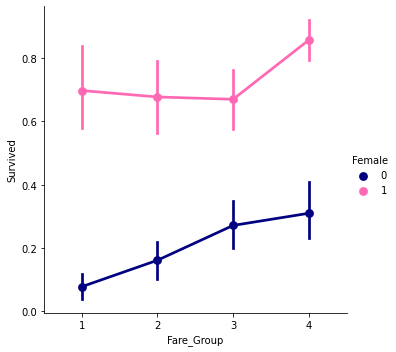

In [ ]:
sns.factorplot('Fare_Group','Survived',data=df,hue='Female',palette ={0: "navy", 1: "hotpink"})
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



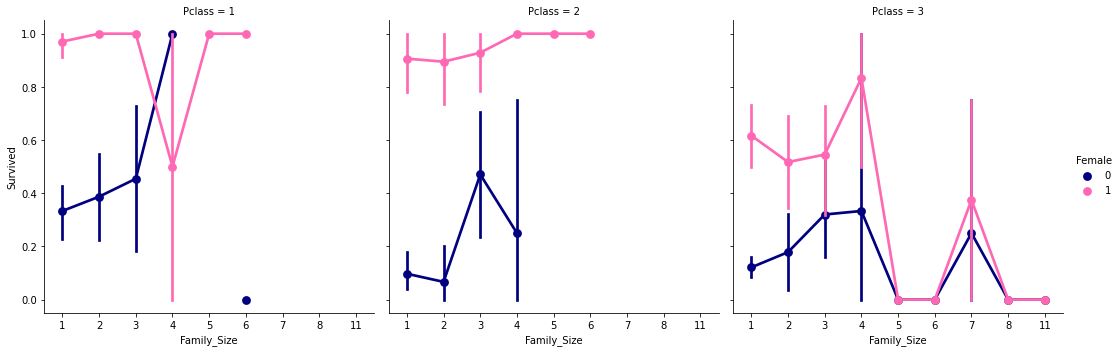

In [ ]:
sns.factorplot('Family_Size','Survived',data=df,hue='Female',col='Pclass',palette ={0: "navy", 1: "hotpink"})
plt.show()

In [ ]:
#Especially in Pclass = 1,2 , Females has significant better survival rate than males.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



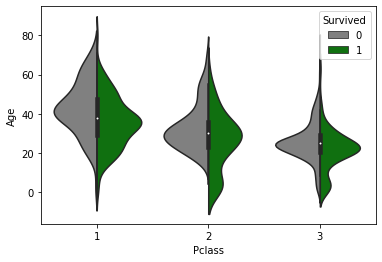

In [ ]:
sns.violinplot("Pclass","Age", hue="Survived", data=df,split=True,palette ={0: "gray", 1: "green"})
plt.show()

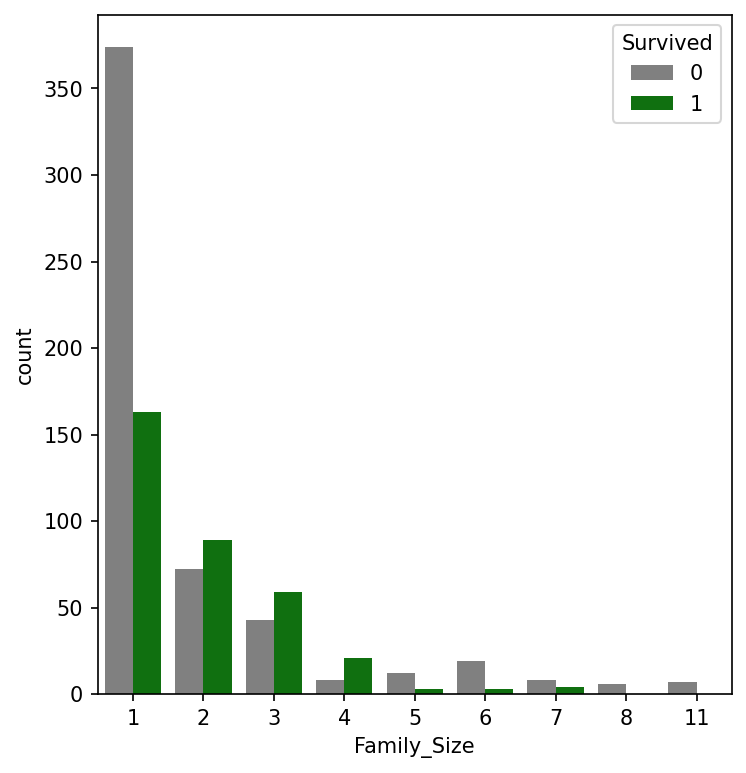

,Family_Size,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [ ]:
plt.figure(figsize=(12,6), dpi = 150)
plt.subplot(1,2,1)
sns.countplot(x = 'Family_Size', data = df, hue= "Survived",palette={0: "gray", 1: "green"})
plt.legend(title="Survived",loc='upper right')

plt.show()

df[["Family_Size", "Survived"]].groupby(['Family_Size'], as_index=False).mean().sort_values(by="Survived", ascending=False)

In [ ]:
df=df.drop(['PassengerId','Name','Age',"SibSp","Parch","Fare"], axis=1)


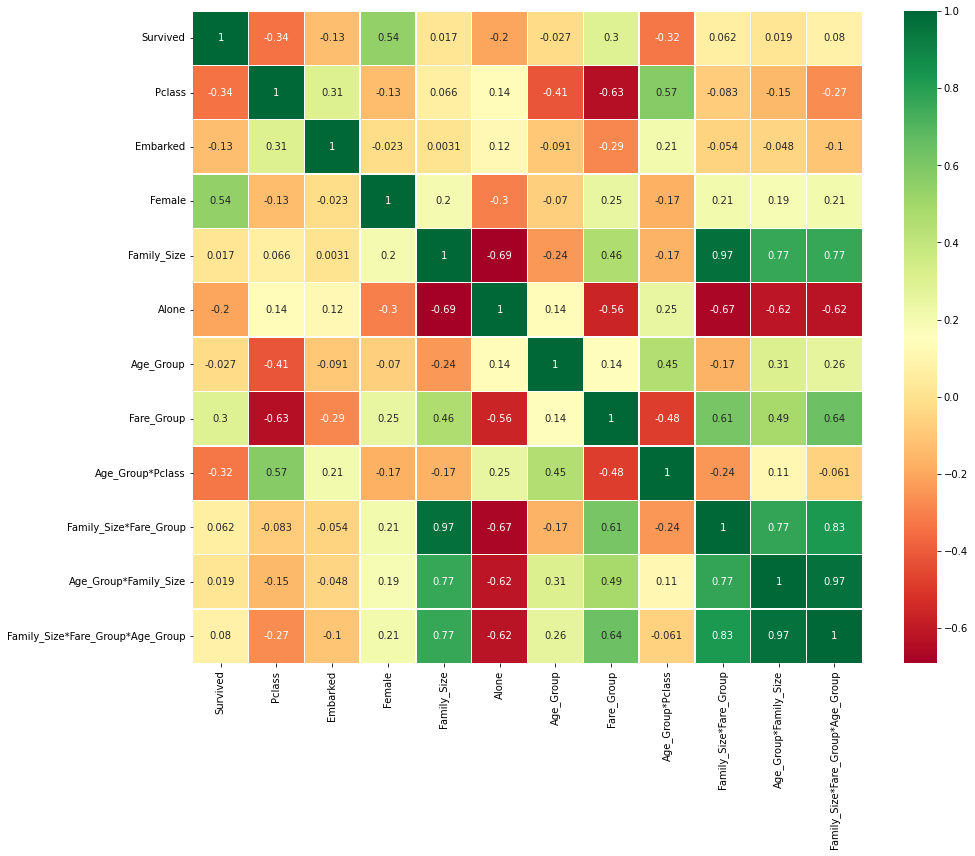

In [ ]:
fig=plt.gcf()
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.4)
fig.set_size_inches(15,12)
plt.show()


In [ ]:
#We can see being alone, Fare, Age affects being survived.
df

,Survived,Pclass,Embarked,Female,Family_Size,Alone,Age_Group,Fare_Group,Age_Group*Pclass,Family_Size*Fare_Group,Age_Group*Family_Size,Family_Size*Fare_Group*Age_Group
0,0,3,1,0,2,0,2,1,6,2,4,4
1,1,1,0,1,2,0,3,4,3,8,6,24
2,1,3,1,1,1,1,2,2,6,2,2,4
3,1,1,1,1,2,0,3,4,3,8,6,24
4,0,3,1,0,1,1,3,2,9,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,0,1,1,3,2,6,2,3,6
887,1,1,1,1,1,1,2,3,2,3,2,6
888,0,3,1,1,4,0,2,3,6,12,8,24
889,1,1,0,0,1,1,2,3,2,3,2,6


In [ ]:
#Also we can apply some feature engineering for the Titles in the names but I couldn't make it happen.